<a href="https://colab.research.google.com/github/lisaborysenko/Projekt_inwd/blob/main/projekt_z_inwd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##**Analiza i wizualizacja danych dotyczących wartości odżywczych w produktach restauracji McDonalds**




# **Wstęp**


Zestaw danych zawiera analizę składników odżywczych produktów z menu restauracji McDonald z podziałem na kategorie takie jak: śniadania, burgery wołowe, kanapki z kurczkami i rybą, frytki, sałatki, napoje gazowane, kawy i herbaty, smoothies i desery.


Zmienne to kalorie, wielkosc porcji oraz składniki odżywcze takie jak: węglowodany, tłuszcze, białko, witaminy, minerały. 



# **Agenda**


1.   Importowania pakietów
2.   Wczytywanie danych
3.   Rozkład kalorii według produktów
4.   Zależność między kalorycznością a zawartością tłuszczu
5.   Rozkład składników odżywczych w podziału na kategorie
6.   Średnia wartość kalorii z podziałem na kategorie
7.   10 produktów z największą zawartością cholesterolu
8. Skład odżywczy danego produktu
9. Top 5 Najzdrowszych Produktów
10. Top 10 produktów z najmniejszą zawartością cukrów





## Importowanie pakietów 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import seaborn as sns
from palettable.colorbrewer.qualitative import Paired_12 
from matplotlib.colors import ListedColormap

## Wczytywanie danych

In [ ]:
data = pd.read_csv('menu.csv', encoding='utf-8')
data

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


## Usunięcie niepotrzebnych danych

In [ ]:
#data = data.drop(columns=['Serving Size'])
#data = data.drop(columns=['Calories from Fat'])
#data = data.drop(columns=['Total Fat (% Daily Value)'])
#data = data.drop(columns=['Carbohydrates (% Daily Value)'])
#data = data.drop(columns=['Dietary Fiber (% Daily Value)'])
#data = data.drop(columns=['Saturated Fat (% Daily Value)'])
#data = data.drop(columns=['Cholesterol (% Daily Value)'])
#data = data.drop(columns=['Saturated Fat'])
data = data.drop(columns=['Sodium (% Daily Value)'])
data

,Category,Item,Calories,Total Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,300,13.0,0.0,260,750,31,4,3,17,10,0,25,15
1,Breakfast,Egg White Delight,250,8.0,0.0,25,770,30,4,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,370,23.0,0.0,45,780,29,4,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,450,28.0,0.0,285,860,30,4,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,400,23.0,0.0,50,880,30,4,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),510,17.0,0.5,45,280,80,1,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),690,23.0,1.0,55,380,106,1,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),340,11.0,0.0,30,190,53,1,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),810,32.0,1.0,60,400,114,2,103,21,20,0,60,6


##Rozkład kalorii według produktów 

Wykres słupkowy pokazuje ile kalorii ma każdy produkt z kategorii śniadania. 

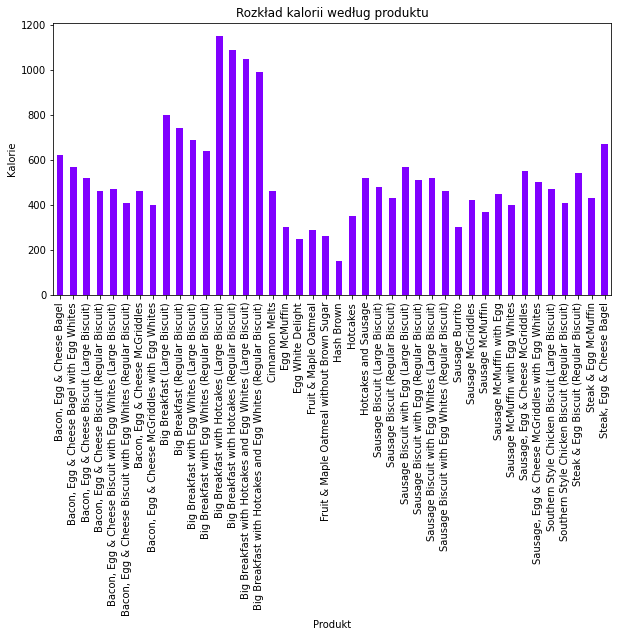

In [ ]:
data[data['Category'] == 'Breakfast'].groupby(['Item'])['Calories'].sum().plot(kind='bar', figsize=(10,5), cmap='rainbow')
plt.xlabel('Produkt')
plt.ylabel('Kalorie')
plt.title('Rozkład kalorii według produktu')
plt.show()


##Zależność między kaloriami a tłuszczem całkowitym 
Wykres punktowy pokazuje rosnącą zależność między wartością kaloryczną a zawartością tłuszczu, im produkt ma większą zawartość tłuszczu tym ma większą kaloryczność.  

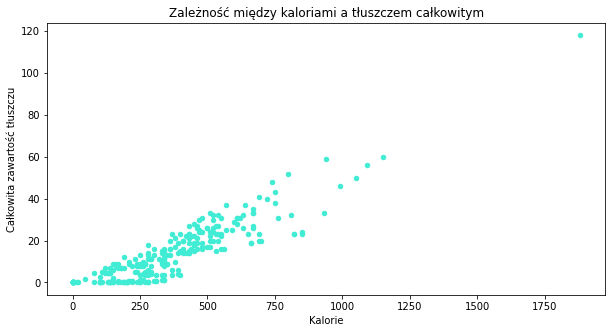

In [ ]:
data.plot.scatter(x='Calories', y='Total Fat', figsize=(10,5), color='#41ecd4')
plt.xlabel('Kalorie')
plt.ylabel('Całkowita zawartość tłuszczu')
plt.title('Zależność między kaloriami a tłuszczem całkowitym')
plt.show()

##Rozkład składników odżywczych w podziału na kategorie
Mapa ciepła pokazuje zawartość Witaminy A, C, Wapnia i Żelaza w każdej kategorii.

In [ ]:
data.rename(columns= {'Vitamin A (% Daily Value)':'Vitamin A', 'Vitamin C (% Daily Value)':'Vitamin C', 'Calcium (% Daily Value)':'Calcium', 'Iron (% Daily Value)':'Iron'}, inplace=True)
witaminy = data[['Category','Vitamin A','Vitamin C','Calcium','Iron']]
witaminy = witaminy.groupby(['Category']).mean()
print(witaminy)

                     Vitamin A  Vitamin C    Calcium       Iron
Category                                                       
Beef & Pork           6.933333   7.333333  23.000000  23.333333
Beverages             0.740741  23.481481   2.962963   0.296296
Breakfast             6.928571   8.904762  16.166667  17.142857
Chicken & Fish       20.444444  12.629630  15.444444  16.370370
Coffee & Tea         10.736842   0.000000  28.294737   2.147368
Desserts              5.142857   4.142857  11.428571   4.000000
Salads              146.666667  28.333333  15.000000  10.333333
Smoothies & Shakes   18.750000   6.964286  35.571429   3.964286
Snacks & Sides        4.846154  28.153846   6.000000   6.615385


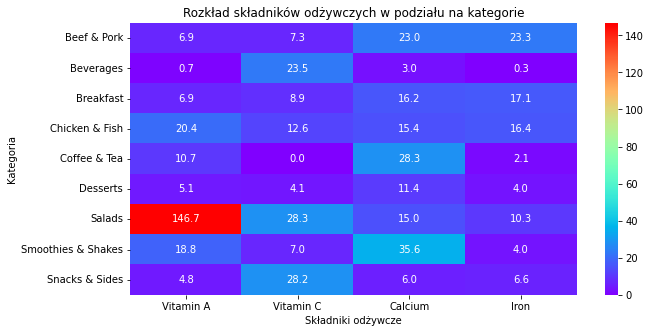

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(witaminy , cmap='rainbow', annot=True, fmt='.1f')
plt.title('Rozkład składników odżywczych w podziału na kategorie')
plt.xlabel('Składniki odżywcze')
plt.ylabel('Kategoria')
plt.show()

##Średnia wartość kalorii z podziałem na kategorie
Wykres kołowy pokazuje procentową średnią wartość kalorii w każdej kategorii

In [ ]:
kalorie = data[['Category','Calories']]
kalorie = kalorie.groupby(['Category']).mean().rename(columns={'Calories':'Średnia wartość kalorii'})
print(kalorie)

                    Średnia wartość kalorii
Category                                   
Beef & Pork                      494.000000
Beverages                        113.703704
Breakfast                        526.666667
Chicken & Fish                   552.962963
Coffee & Tea                     283.894737
Desserts                         222.142857
Salads                           270.000000
Smoothies & Shakes               531.428571
Snacks & Sides                   245.769231


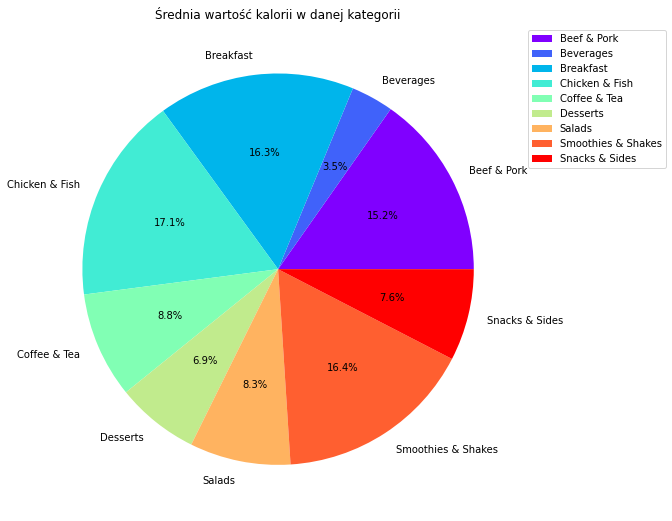

In [ ]:
kalorie.plot.pie(y='Średnia wartość kalorii', figsize=(9, 9), cmap='rainbow', autopct='%1.1f%%')
plt.title('Średnia wartość kalorii w danej kategorii')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")    #bbox_to_anchor - krotka współrzędnych x i y dla pozycji legendy. Współrzędne (1,1) ustawiają lewy górny róg legendy poza obszarem wykresu.
plt.ylabel('')
plt.show()


##Funkcja wyszukująca wartość cholesterolu dla wybranego produktu


In [ ]:
wart_cholesterol = data[['Item','Cholesterol']]
wart_cholesterol = wart_cholesterol.sort_values(by='Cholesterol', ascending=False)
wart_cholesterol.head(10)

,Item,Cholesterol
32,Big Breakfast with Hotcakes (Large Biscuit),575
31,Big Breakfast with Hotcakes (Regular Biscuit),575
28,Big Breakfast (Large Biscuit),555
27,Big Breakfast (Regular Biscuit),555
5,Steak & Egg McMuffin,300
26,"Steak, Egg & Cheese Bagel",295
3,Sausage McMuffin with Egg,285
18,Steak & Egg Biscuit (Regular Biscuit),280
24,"Bacon, Egg & Cheese Bagel",275
22,"Sausage, Egg & Cheese McGriddles",265


In [ ]:
def wartosc_cholesterolu(nazwa_item):
    cholesterol = data[data['Item']==nazwa_item]['Cholesterol']
    if cholesterol.empty:
        return 'Nie ma takiego produktu'
    return cholesterol.values[0]

print('Wartość cholesterolu wynosi: ', wartosc_cholesterolu(input("Wpisz nazwę produktu: ")))


Wpisz nazwę produktu: Egg McMuffin
Wartość cholesterolu wynosi:  260


## Wykres kołowy pokazujący skład odżywczy danego produktu
 Funkcja wyszukująca i generująca wykres kołowy procentowej wartości węglowodanów, białka, tłuszczu dla wybranego produktu


Wpisz nazwę produktu:Egg McMuffin


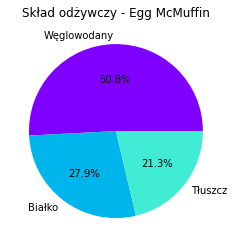

None


In [ ]:
def sklad_odzywczy(nazwa_item):
    data_item = data[data['Item']==nazwa_item]
    if data_item.empty:
        return 'Nie ma takiego produktu'
    kalorie = data_item['Calories'].values[0]
    weglowodany = (data_item['Carbohydrates'].values[0] / kalorie) * 100
    bialko = (data_item['Protein'].values[0] / kalorie) * 100
    tluszcz = (data_item['Total Fat'].values[0] / kalorie) * 100
    pie_data = [weglowodany, bialko, tluszcz]
    labels = ['Węglowodany', 'Białko', 'Tłuszcz']
#„%1.1f%%” służy do wyświetlania wartości w procentach z jednym przecinkiem dziesiętnym
    plt.pie(pie_data, labels=labels, autopct='%1.1f%%', colors=["#8000ff", "#00b5eb", "#41ecd4"]) 
    plt.title('Skład odżywczy - ' + nazwa_item)
    plt.show()

print(sklad_odzywczy(input('Wpisz nazwę produktu:')))



## Wykres - Top 5 Najzdrowszych Produktów

Funckcja generująca wykres słupkowy na podstawie wskaźników - 'Vitamin A', 'Vitamin C', 'Iron', 'Calcium'

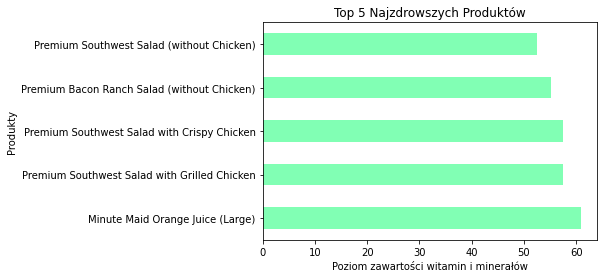

None


In [ ]:
def piec_najzdrowszych_produktow():
    dane_produktu = data.groupby(['Item'])[['Vitamin A', 'Vitamin C', 'Iron', 'Calcium']].sum()
    dane_produktu['Poziom zawartości witamin i minerałów'] = (dane_produktu['Vitamin A'] + dane_produktu['Vitamin C'] + dane_produktu['Iron'] + dane_produktu['Calcium'])/4
    dane_produktu = dane_produktu.sort_values(by='Poziom zawartości witamin i minerałów', ascending=False)
    top_5 = dane_produktu.head(5)
    top_5.plot(kind='barh', y='Poziom zawartości witamin i minerałów', legend=False, color = '#81ffb4')
    plt.ylabel("Produkty")
    plt.xlabel("Poziom zawartości witamin i minerałów")
    plt.title("Top 5 Najzdrowszych Produktów")
    plt.show()

print(piec_najzdrowszych_produktow())

## Wykres - Top 10 produktów z najmniejszą zawartością cukrów
Wykres słupkowy pokazujący top 10 produktów z najmniejszą zawartością cukrów 

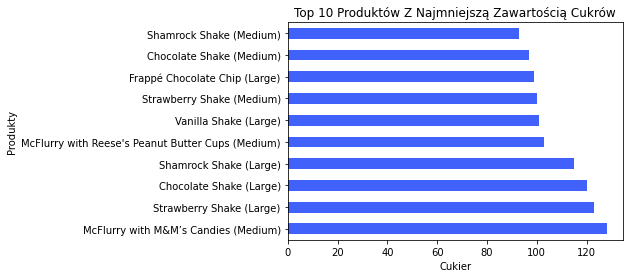

None


In [ ]:
def top_produktow_z_najmniejsza_zaw_cukrow():
    cukier = data.sort_values(by='Sugars', ascending=False)
    top_10 = cukier.head(10)
    top_10 = top_10[['Item', 'Sugars']]
    top_10.plot(kind='barh', x='Item', y='Sugars', legend=False, color = "#4062fa")
    plt.xlabel("Cukier")
    plt.ylabel("Produkty")
    plt.title("Top 10 Produktów Z Najmniejszą Zawartością Cukrów")
    plt.show()
print(top_produktow_z_najmniejsza_zaw_cukrow())

## Średnia kaloryczność wszystkich produktów

In [ ]:
def srednia_kalorycznosc(data):
    return np.mean(data['Calories'])
srednia_kalorycznosc(data)

368.2692307692308